In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

In [127]:
df = pd.read_csv('cubic_zirconia.csv')

In [128]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [129]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [130]:
df = df.drop('Unnamed: 0', axis=1)

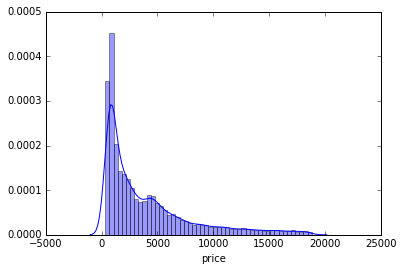

In [93]:
sns.distplot(df['price'])
plt.show()

In [131]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]
dups.head()

Number of duplicate rows = 34


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [132]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [118]:
df[df['carat']==0.0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [117]:
df[df['price']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [119]:
df[df['depth']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


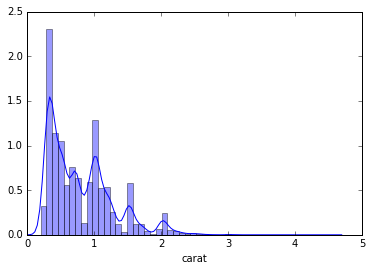

In [101]:
sns.distplot(df['carat'])
plt.show()

D:\New folder\python\lib\site-packages\seaborn\distributions.py:39: RuntimeWarning: invalid value encountered in ceil
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: cannot convert float NaN to integer

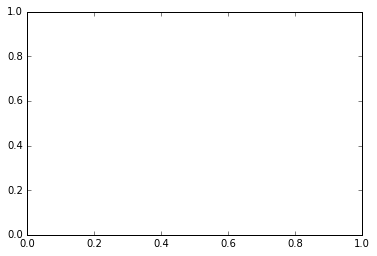

In [102]:
sns.distplot(df['depth'])
plt.show()

In [70]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


feature: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


feature: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


In [138]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [152]:
df.rename(columns = {"cut_Very Good": "cut_Very_Good"},inplace = True)

In [133]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [107]:
df['price'].value_counts(sort = True)


544      74
625      67
776      66
828      66
605      64
         ..
7643      1
3561      1
7659      1
17904     1
8284      1
Name: price, Length: 8742, dtype: int64

In [110]:
df['carat'].value_counts(sort = True)

0.30    1331
0.31    1118
1.01    1111
0.70     959
0.32     950
        ... 
2.65       1
1.89       1
4.50       1
1.88       1
3.51       1
Name: carat, Length: 257, dtype: int64

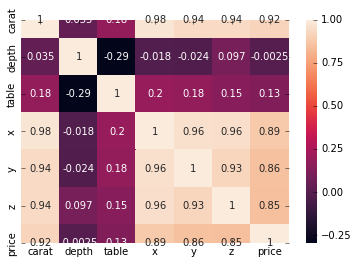

In [43]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif.head(20)

,VIF,features
0,165.286869,carat
1,628.324081,depth
2,629.827262,table
3,1114.192197,x
4,350.163873,y
5,339.708617,z
6,24.802334,price
7,4.175648,cut_Good
8,15.622451,cut_Ideal
9,10.130335,cut_Premium


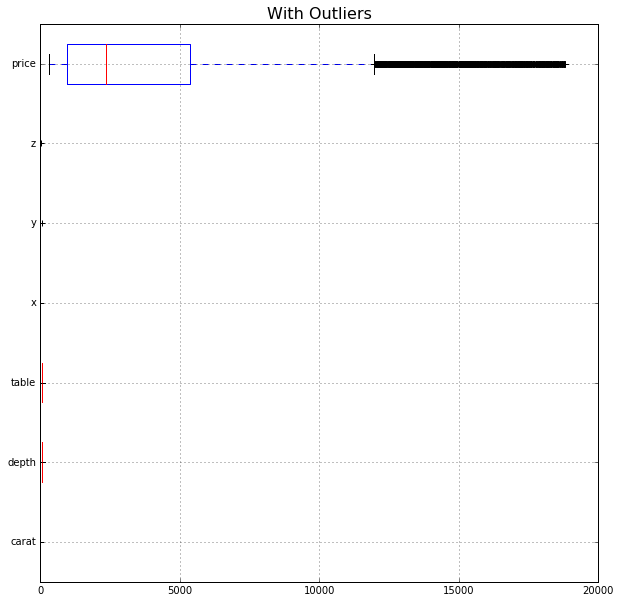

In [134]:
# construct box plot for continuous variables
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [135]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [136]:
lr,ur=remove_outlier(df['price'])
df['price']=np.where(df['price']>ur,ur,df['price'])
df['price']=np.where(df['price']<lr,lr,df['price'])

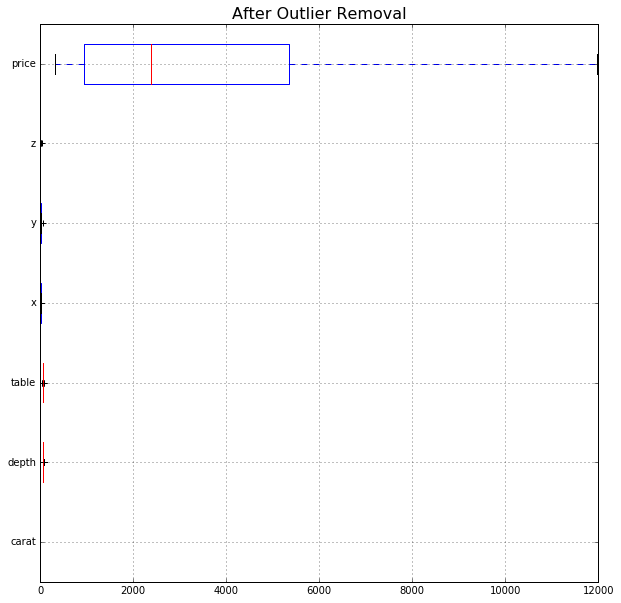

In [125]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

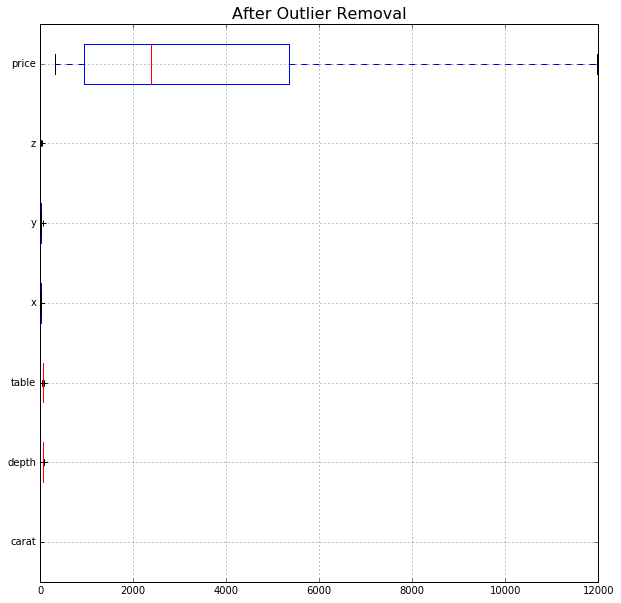

In [137]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [139]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [140]:

from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [142]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18853, 23), (18853, 1), (8080, 23), (8080, 1))

In [143]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [144]:

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
importance = regression_model.coef_
for i,v in enumerate(importance):
    print ('Feature of %0d, Score of %.5f' %(i,v))

TypeError: only size-1 arrays can be converted to Python scalars

In [145]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 0.9336627212882266
The coefficient for depth is 0.0030213460217443358
The coefficient for table is -0.00829496184525669
The coefficient for x is 0.11934473649390785
The coefficient for y is 0.012022077244559986
The coefficient for z is 0.0004631368240287378
The coefficient for cut_Good is 0.041798452965412944
The coefficient for cut_Ideal is 0.1005523164608686
The coefficient for cut_Premium is 0.08137137884115554
The coefficient for cut_Very Good is 0.07780208702937445
The coefficient for color_E is -0.019706937329263312
The coefficient for color_F is -0.0268595154610537
The coefficient for color_G is -0.04872843563516146
The coefficient for color_H is -0.08529581454479944
The coefficient for color_I is -0.11309912030742296
The coefficient for color_J is -0.12518843128267673
The coefficient for clarity_IF is 0.22478956152654692
The coefficient for clarity_SI1 is 0.3544068925151113
The coefficient for clarity_SI2 is 0.21709642982462216
The coefficient for c

In [146]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.924745826117373e-17


In [147]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9294689075730002

In [148]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

import math

math.sqrt(mse)

0.2655769049202131

In [149]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

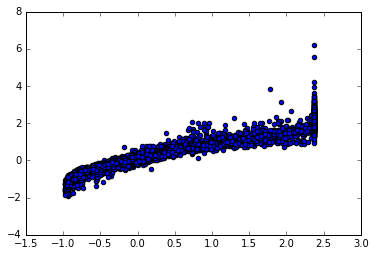

In [150]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 24 columns):
carat            26933 non-null float64
depth            26933 non-null float64
table            26933 non-null float64
x                26933 non-null float64
y                26933 non-null float64
z                26933 non-null float64
price            26933 non-null float64
cut_Good         26933 non-null uint8
cut_Ideal        26933 non-null uint8
cut_Premium      26933 non-null uint8
cut_Very Good    26933 non-null uint8
color_E          26933 non-null uint8
color_F          26933 non-null uint8
color_G          26933 non-null uint8
color_H          26933 non-null uint8
color_I          26933 non-null uint8
color_J          26933 non-null uint8
clarity_IF       26933 non-null uint8
clarity_SI1      26933 non-null uint8
clarity_SI2      26933 non-null uint8
clarity_VS1      26933 non-null uint8
clarity_VS2      26933 non-null uint8
clarity_VVS1     26933 non-null uint8
cla

In [153]:
expr= 'price ~ carat + depth + table+x +y + z + cut_Good + cut_Ideal  + cut_Premium + cut_Very_Good + color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'

In [154]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = df).fit()
lm1.params

Intercept       -7155.621815
carat            6760.397065
depth               7.270806
table             -13.505536
x                 371.630853
y                  47.400185
z                  -0.701594
cut_Good          500.048374
cut_Ideal         709.193430
cut_Premium       648.470568
cut_Very_Good     639.114810
color_E          -194.428268
color_F          -248.120646
color_G          -406.705267
color_H          -819.013385
color_I         -1284.643063
color_J         -1913.540968
clarity_IF       4480.032490
clarity_SI1      2990.474270
clarity_SI2      2141.084682
clarity_VS1      3820.104057
clarity_VS2      3536.763131
clarity_VVS1     4272.601966
clarity_VVS2     4238.900295
dtype: float64

In [155]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.526e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:24:41   Log-Likelihood:            -2.2217e+05
No. Observations:               26933   AIC:                         4.444e+05
Df Residuals:                   26909   BIC:                         4.446e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7155.6218    473.621    -15.108

In [156]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-7155.62) * Intercept + (6760.4) * carat + (7.27) * depth + (-13.51) * table + (371.63) * x + (47.4) * y + (-0.7) * z + (500.05) * cut_Good + (709.19) * cut_Ideal + (648.47) * cut_Premium + (639.11) * cut_Very_Good + (-194.43) * color_E + (-248.12) * color_F + (-406.71) * color_G + (-819.01) * color_H + (-1284.64) * color_I + (-1913.54) * color_J + (4480.03) * clarity_IF + (2990.47) * clarity_SI1 + (2141.08) * clarity_SI2 + (3820.1) * clarity_VS1 + (3536.76) * clarity_VS2 + (4272.6) * clarity_VVS1 + (4238.9) * clarity_VVS2 + 

In [160]:
print (pd.DataFrame(regression_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [ ]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [ ]:
hp = pd.read_csv('Holiday_Package.csv')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head()

In [ ]:
hp = hp.drop('Unnamed: 0', axis=1)

In [ ]:
hp.head()

In [ ]:
hp.boxplot()

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(hp[['age', 'foreign', 'no_young_children','no_older_children']].corr(), annot=True)

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lratio,uratio=remove_outlier(hp['Salary'])
hp['Salary']=np.where(hp['Salary']>uratio,uratio,hp['Salary'])
hp['Salary']=np.where(hp['Salary']<lratio,lratio,hp['Salary'])

In [ ]:
for feature in hp.columns: 
    if hp[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(hp[feature].unique()))
        print(pd.Categorical(hp[feature].unique()).codes)
        hp[feature] = pd.Categorical(hp[feature]).codes

In [ ]:
X = hp.drop("Holliday_Package" , axis=1)

y = hp.pop("Holliday_Package")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
clf = LinearDiscriminantAnalysis()

In [ ]:
model1=clf.fit(X_train,Y_train)
model1

In [ ]:
pred_class = model1.predict(X_test)

In [ ]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

In [ ]:
confusion_matrix(Y_train, ytrain_predict)

In [ ]:
print(classification_report(Y_train, ytrain_predict))

In [ ]:
cnf_matrix=confusion_matrix(Y_test, ytest_predict)
cnf_matrix

In [ ]:
print(classification_report(Y_test, ytest_predict))

In [ ]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
print(classification_report(Y_test, pred_class))

In [ ]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
# Accuracy - Test Data
model.score(X_test, Y_test)

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)